In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import datasets,transforms

In [3]:
image_to_number = transforms.Compose([
    transforms.ToTensor(),
])

In [4]:
train_data = datasets.FashionMNIST(
    root="fashion_mnist_data", #where do we want the dataset, in what folder do we want our images
    train=True, # do we want the trining data, if set FALSE then we want the take the test data
    transform=image_to_number, # How do we want to transform the Features (like changing to number)
    download=True, # do we want to download the data
    target_transform=None #How do we want to transforms the Target (like Cat, Dog -> 0,1)
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 119MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.27MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 61.7MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.3MB/s]


In [5]:
test_data = datasets.FashionMNIST(
    root="fashion_mnist_data",
    train=False,
    transform=image_to_number,
    download=True,
    target_transform=None
)

In [6]:
train_Loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_Loader = DataLoader(test_data,batch_size=32,shuffle=False)

In [7]:
len(train_data)

60000

In [8]:
index = train_data.class_to_idx
index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

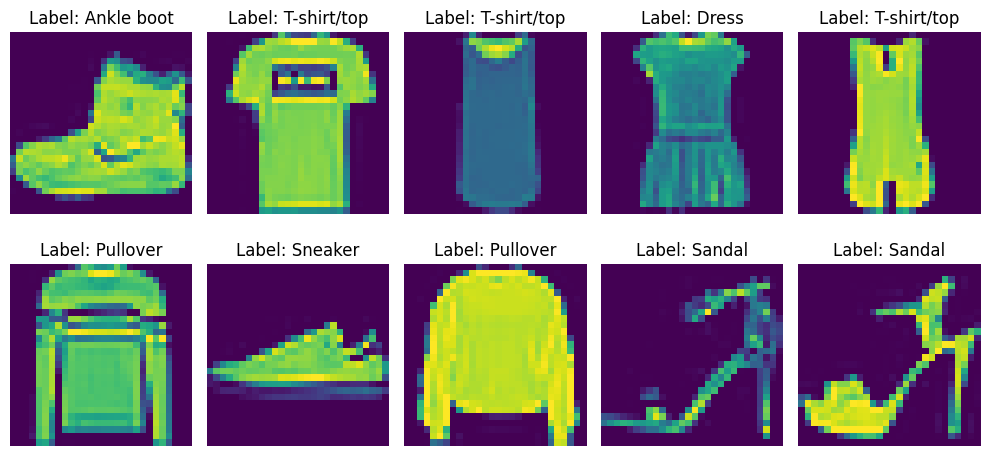

In [9]:
import matplotlib.pyplot as plt

# Create reverse mapping: number → class name
index = {v: k for k, v in train_data.class_to_idx.items()}

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

for i in range(10):
    image, label = train_data[i]

    row = i // 5
    col = i % 5

    ax = axs[row][col]
    ax.imshow(image.permute(1, 2, 0).numpy())  # Use permute for RGB image
    ax.set_title(f"Label: {index[label]}")
    ax.axis('off')  # Hide axes for clean look

plt.tight_layout()
plt.show()


In [10]:
#Training Loop for the Neural Network



Whenever we are trying to build a model its better to start with a baseline model and then we can imporve the model and imprve on it


In [11]:
class FashionMNIST_MODEL(nn.Module):

  def __init__(self,
               input_shape:int,
               hidden:int,
               output_shape:int):
    super().__init__()
    self.stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden),
        nn.Linear(in_features=hidden,out_features=output_shape)

    )

  def forward(self,x):
    return self.stack(x)


In [12]:
model = FashionMNIST_MODEL(input_shape=784,hidden=10,output_shape=len(index)).to("cpu")

model

FashionMNIST_MODEL(
  (stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [13]:
#Great when we we want to check the shapes

dummy_x = torch.rand([1,1,28,28])

model.forward(dummy_x)

tensor([[ 0.2674, -0.2505, -0.4068, -0.2008, -0.2813,  0.3031,  0.0313, -0.0706,
          0.2541,  0.4079]], grad_fn=<AddmmBackward0>)

In [14]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9 )

In [15]:
# A accuracu function

def accuracy_function(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [16]:
# Machine Learning is expiremental where we always calculate
# 1. Performance of the model
# 2. How fast it runs



In [17]:
from torch.utils.benchmark import Timer

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [18]:
from timeit import default_timer as timer

In [19]:
def timer_function(start:float,
                   end:float,
                   device : torch.device = None):
  total_time = end - start
  print(f"Timer on {device}: {total_time:.3f} seconds ")

In [20]:
start_time = timer()
end_time = timer()

timer_function(start=start_time,end=end_time)

Timer on None: 0.000 seconds 


### Steps in training the model

1. Loop Through Epochs
2. Loop Through training batches and calculate the train loss per batch
3. Loop Thriogh testing batches, and calculate the test loss per batch
4. Print
5. Timer Function

In [23]:
from tqdm.auto import tqdm

epochs = 3
torch.manual_seed(42)

train_time_start_cpu = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epochs : {epoch+1}")

  train_loss = 0

  #Train Loader
  for i,data in enumerate(train_Loader):
    features ,target = data
    optimizer.zero_grad()
    outputs = model(features)
    loss = loss_function(outputs,target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()





  test_loss = 0
  test_acc = 0


  model.eval()

  with torch.inference_mode():
    for features,target in test_Loader:
      outputs = model(features) # Forward Pass
      test_loss += loss_function(outputs,target)
      test_acc += accuracy_function(y_true=target, y_pred=outputs.argmax(dim=1))


    train_loss /= len(train_Loader)
    test_loss /= len(test_Loader)
    test_acc /= len(test_Loader)
  print(f"rain Loss : {train_loss}  Test Loss :{test_loss} and Test Accuracy :{test_acc}")

train_time_end_cpu = timer()

total_time = timer_function(start=train_time_start_cpu,end=train_time_end_cpu,device=str(next(model.parameters()).device))





  0%|          | 0/3 [00:00<?, ?it/s]

Epochs : 1
rain Loss : 0.42981993946234387  Test Loss :0.4704672694206238 and Test Accuracy :83.77595846645367
Epochs : 2
rain Loss : 0.42585940897067387  Test Loss :0.46424031257629395 and Test Accuracy :83.40654952076677
Epochs : 3
rain Loss : 0.4203036442955335  Test Loss :0.47607022523880005 and Test Accuracy :83.14696485623003
Timer on cpu: 33.195 seconds 


In [52]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_function:torch.nn.Module,
               accuracy_function):

  model.eval()

  total_loss,total_acc = 0.0,0.0
  with torch.inference_mode():
    for X,y in data_loader:

      y_pred = model(X)
      total_loss += loss_function(y_pred,y).item()
      total_acc += accuracy_function(y_true=y , y_pred=y_pred.argmax(dim=1))

  return {
      "model":model.__class__.__name__,
      "loss":total_loss / len(data_loader),
      "accuracy":(total_acc/len(data_loader))
  }

In [53]:
results = eval_model(model=model,
                     data_loader=test_Loader,
                     loss_function=loss_function,
                     accuracy_function=accuracy_function)

In [54]:
print(results)

{'model': 'FashionMNIST_MODEL', 'loss': 0.47607033652143355, 'accuracy': 83.14696485623003}
